a. Upload a CSV file
b. Provide a url
c. Use a demo file

  is not a valid option. Please try again.
a. Air Travel Data
b. Hurricane Data
c. Height and Weight Data
a. print headings
b. print first two rows
c. print cvs
d. show scatter plot
e. show line graph
1.  Height(Inches)"
2.  "Weight(Pounds)"
2.  "Weight(Pounds)"


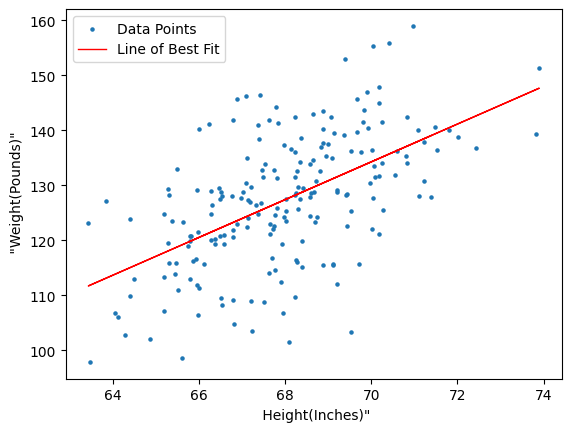


Thank you for using the program!


In [1]:
# LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog


# * HELPER FUNCTIONS
# SET CSV TO DATAFRAME
def get_df():
    # Get file option
    fileOpt, source = get_file()
    if fileOpt == 'demo':
        source = get_demoFile() # get demo file
    return pd.read_csv(source).drop(columns=['Index'], errors='ignore') # return data as dataframe and drop index column ##! CSV saved as a pandas dataframe 


# GET FILE
def get_file():
    # Initialize and print options
    optionsFile = {'a': 'Upload a CSV file', 'b': 'Provide a url', 'c': 'Use a demo file'}
    for key, value in optionsFile.items():
        print(f"{key}. {value}")
    # Get user's choice
    while True:
        selected = input("\nSelect an option (only enter the letter): ")
        # Validate the user's choice
        if selected in optionsFile:
            selected = selected.replace('.','').lower() # ! ensure option is lowercase and without a period
            if selected == 'a':
                # Upload a CSV file
                return '', upload_csv()
            elif selected == 'b':
                # Provide a url
                return '', enter_url()
            elif selected == 'c':
                # Use a demo file
                return 'demo', ''
        print(f"\n {selected} is not a valid option. Please try again.") # print error message if invalid and try again


# GET AXES
def get_axes(columns):
    # Convert columns into numbered options    
    optionsColumns = {str(i + 1): columns[i] for i in range(len(columns))}
    axes = [] # For storing the selected options
    # Print options and get user's choices
    for _ in range(2):  # Repeat twice to get two options
        for key, value in optionsColumns.items():
            print(f"{key}. {value}")
        while True:
            selected = input("\nSelect an option (only enter the number): ")
            # Validate the user's choice
            if selected in optionsColumns:
                selected_option = optionsColumns[selected]
                axes.append(selected_option)
                del optionsColumns[selected]  # Remove the selected option from the dictionary
                break
            print(f"\n{selected} is not a valid option. Please try again.")
    return tuple(axes)


# GET DEMO FILE
def get_demoFile():
    # Initialize and print options
    links = {'a': 'https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv', 'b': 'https://people.sc.fsu.edu/~jburkardt/data/csv/hurricanes.csv', 'c': 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'}
    optionsDemo = {'a': 'Air Travel Data', 'b': 'Hurricane Data', 'c': 'Height and Weight Data'}
    for key, value in optionsDemo.items():
        print(f"{key}. {value}")
    # Get user's choice
    while True:
        selected = input("\nSelect an option (only enter the letter): ")
        # Validate the user's choice
        if selected in optionsDemo:
            selected = selected.replace('.','').lower() # ! ensure option is lowercase and without a period
            return links[selected]
        print(f"\n {selected} is not a valid option. Please try again.") # print error message if invalid and try again


# ASK USER FOR ANOTHER OPTION
def again():
    # Ask user if they want to run the program again
    while True:
        again = input("\nWould you like to run the program again? (y/n): ")
        # Validate the user's choice
        if again.lower() == 'y':
            return main()
        elif again.lower() == 'n':
            print("\nThank you for using the program!")
            break
        print(f"\n{again} is not a valid option. Please try again.")
    return


# PREPARE DATA FOR GRAPHING
def prepare_data():
    # Convert column names to list
    columns = df.columns.tolist() ##! Column names stored as a list
    # Ask user for x and y axis
    columns = get_axes(columns)
    # Convert columns to numpy arrays
    x, y = df[columns[0]].to_numpy(), df[columns[1]].to_numpy() ##! Columns chosen and converted to numpy arrays
    return x, y, columns


# UPLOAD CSV
def upload_csv():
    # Create a Tkinter window
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    # Ask the user to select a CSV file using a file dialog
    filePath = filedialog.askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])

    if filePath:
        try:
            # Read the selected CSV file using Pandas
            pd.read_csv(filePath)
            print("CSV file loaded successfully!")
            return filePath
        except Exception as e:
            print("Error: Unable to load the CSV file.")
            print(e)
    else:
        print("No file selected. Upload canceled.")


# ENTER URL
def enter_url():
    # Get the url
    url = input("Enter the url: ")
    # Validate the url
    while True:
        if url.endswith('.csv'):
            break
        print(f"\n{url} is not a valid url. Please try again.")
        url = input("Enter the url: ")
    return url


# * FUNCTIONS
# PRINT HEADINGS
def print_headings():
    return [print(heading) for heading in df.columns]


# PRINT FIRST TWO ROWS
def print_first_two_rows():
    return print(df.head(2))


# PRINT FULL DATAFRAME
def print_cvs():
    return print(df)


# SHOW SCATTER PLOT
def show_scatter_plot(): 
    # Prepare data
    x, y, columns = prepare_data()
    # Plot the scatter plot
    plt.scatter(x, y, s=5, label='Data Points')
    # Add the line of best fit
    bestFit = np.poly1d(np.polyfit(x, y, 1))
    plt.plot(x, bestFit(x), linestyle='-', color='red', linewidth=1, label='Line of Best Fit')
    # Add labels and legend
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.legend()
    plt.show()
    return


# SHOW LINE GRAPH
def show_line_graph():
    # Prepare data
    x, y, columns = prepare_data()
    # Plot the line graph
    plt.plot(x, y, linestyle='-', color='blue', linewidth=1, label='Line Graph')
    # Add label, legend, and grid
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.legend()
    plt.grid()
    plt.show()
    return


# * GLOBAL VARIABLES
options = {'a': print_headings, 'b': print_first_two_rows, 'c': print_cvs, 'd': show_scatter_plot, 'e': show_line_graph}
df = []

# MENU SELECTION
def menu():
    global options
    while True:
        # Print options
        for key, value in options.items():
            print(f"{key}. {value.__name__.replace('_',' ')}")
        # Get the user's choice
        selected = input("\nSelect an option (only enter the letter): ")
        # Validate the user's choice
        if selected.replace('.','').lower() in options:
            selected = selected.replace('.','').lower() # ! ensure option is lowercase and without a period
            # Run the selected option
            return options[selected]()
        print(f"\n {selected} is not a valid option. Please try again.") # print error message if invalid and try again


# * MAIN FUNCTION
def main():
    global df
    if not isinstance(df, pd.DataFrame): # Check if df is a DataFrame
        df = get_df() # Get CSV data as a DataFrame
    menu() # run menu
    return again() # Ask user for another option


# * RUN PROGRAM
if __name__ == "__main__":
    main()